# Parameters explanation of PERLER (Y. Okochi, 02/09/21)

This tutorial is application of perler to D. melanogaster (Dmel) dataset (Karaiskos et al., 2017).

### import perler

In [1]:
import perler

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Import the additional modules

These modules are not necessary for the procedures of perler. However, they are necessary for loading and saving data.

In [2]:
#for loading data
import pandas as pd
%matplotlib inline

### Loading dataset

This dataset is generated by Karaiskos et al., 2017

and is aquired from Drosophila Virtual Expression eXplorer (DVEX, URL: https://shiny.mdc-berlin.de/DVEX/)


・dge_normalized.txt: scRNAseq data

・bdtnp.txt: in situ data

・geometry_dvex.txt: cell location data


ref: Karaiskos et al, 2017 (doi: 10.1126/science.aan3235)

In [3]:
RNAseq = pd.read_csv('data/dge_normalized.txt',sep='\t').T
BDTNP = pd.read_csv('data/bdtnp.txt', sep='\t')
location=pd.read_csv("data/geometry_dvex.txt", delimiter=" ") #optional

### Making PERLER object

##### The essencial parameters of this function are...

・data; scRNAseq data with gene columns and sample rows

・reference; in situ hybridization data with gene columns and sample rows

・n_metagenes (int) ; it depends on how many metagenes you want to extract. default is 60.

Additionally, you can choose

・DR (str) ; How to reduce dimentionality of the dataset. 'PLSC' (default), 'PCA', and 'NA' (no DR (dimensionality reduction)) can be used.

・print_iter (bool) ; If print_iter is True, likelihood is printed in each 5 steps of EM algorithm implemented in plr.em_algorithm().

In [4]:
%%time
plr = perler.PERLER(data = RNAseq, reference=BDTNP, print_iter=True)

CPU times: user 2.73 s, sys: 1.08 s, total: 3.8 s
Wall time: 313 ms


##### you can see the parameters of this object

Dimensinality reduction

In [5]:
plr.DR

'PLSC'

scRNAseq data

In [6]:
plr.data.head()

,128up,140up,14-3-3epsilon,14-3-3zeta,18w,26-29-p,2mit,4EHP,4E-T,5-HT1A,...,ZnT77C,ZnT86D,zpg,Zpr1,zuc,Zw10,Zwilch,zyd,zye,Zyx
GTACTAATTACN_2,2.5699,1.1599,8.8384,5.9422,3.4430,0.0,0.0,4.6831,1.7945,0.0,...,0.0,0.0000,2.2337,2.8424,3.5981,2.8424,0.0000,1.1599,0.0,3.4430
AGGCTAATGGAC_3,2.5087,3.0066,8.7878,5.4336,3.0066,0.0,0.0,3.9139,2.5087,0.0,...,0.0,1.7423,0.0000,2.5087,3.0066,3.0066,1.7423,1.7423,0.0,4.3048
TAGACAAAAGCT_4,0.0000,0.0000,8.8431,6.0169,2.3175,0.0,0.0,3.1650,2.3175,0.0,...,0.0,0.0000,4.0823,0.0000,2.3175,2.3175,2.3175,0.0000,0.0,4.0823
TCTACTAGTGTN_5,0.0000,0.0000,8.8687,5.0161,4.0600,0.0,0.0,4.0600,3.6735,0.0,...,0.0,2.2986,0.0000,0.0000,3.1440,2.2986,3.1440,2.2986,0.0,5.1810
CCGTGCTGAACA_3,0.0000,0.0000,8.3452,6.0097,3.5326,0.0,0.0,4.2188,2.1776,0.0,...,0.0,2.1776,2.1776,3.5326,3.5326,0.0000,0.0000,3.0086,0.0,3.9161


Reference data

In [7]:
plr.ref.head()

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0.116516,0.224190,0.033730,0.104307,0.673878,0.856570,0.469676,0.286151,0.320923,0.737946,...,0.353227,0.102896,0.153453,0.129360,0.087361,0.147089,0.225082,0.027564,0.297847,0.372422
1,0.113320,0.208761,0.044785,0.103447,0.743820,0.462554,0.570401,0.345240,0.320727,0.913163,...,0.268072,0.093506,0.206405,0.313327,0.230506,0.190749,0.440296,0.024157,0.455723,0.389489
2,0.092872,0.172598,0.036166,0.096985,0.838291,0.467538,0.478229,0.377768,0.297598,0.931254,...,0.315466,0.090488,0.196441,0.161869,0.102645,0.177968,0.347098,0.019817,0.598716,0.502384
3,0.101251,0.207963,0.066009,0.092872,0.597823,0.497481,0.479122,0.580058,0.334111,0.746340,...,0.211007,0.110080,0.205833,0.287976,0.382287,0.189138,0.542763,0.019013,0.570066,0.397117
4,0.127009,0.176440,0.084271,0.027938,0.621983,0.833522,0.680243,0.201147,0.359235,0.755608,...,0.447295,0.079012,0.152232,0.105062,0.109857,0.166762,0.259750,0.025874,0.349462,0.498263


### Generative linear mapping (the first step of perler)

#### The parameter fitting by EM algorithm

##### The essencial parameters of this function are...

・optimize_pi (bool) ; If True, mixing coefficients (pi) are optimized by EM algorithm. If False, mixing coefficients are fixed inital values. The default is True.

In [8]:
%%time
plr.em_algorithm(optimize_pi = False)

0 -inf
5 -299624.18626059196
10 -299590.62390697666
15 -299589.8590121893
CPU times: user 10min 37s, sys: 6min 28s, total: 17min 5s
Wall time: 1min 13s


#### Calculate the pair-wise distance between scRNAseq data and reference data

In [9]:
%%time
plr.calc_dist()

CPU times: user 10 s, sys: 582 ms, total: 10.6 s
Wall time: 9.15 s


showing pair-wise distance between scRNAseq data ans ISH data

In [10]:
plr.DM

array([[11.66246569, 12.08091157, 12.26846815, ..., 10.36298864,
        13.82620994, 12.66811752],
       [11.64935174, 12.72820877, 12.02254983, ...,  9.84309914,
        14.74666774, 12.89949192],
       [11.39303771, 12.55478903, 12.15278166, ..., 10.0576136 ,
        14.35595434, 12.87620518],
       ...,
       [13.48630743, 12.31511249, 12.43747386, ..., 10.34489002,
        15.36380292, 11.91720586],
       [12.06000309, 12.37032896, 12.24725776, ...,  8.9933911 ,
        14.98793979, 11.59333187],
       [12.39086062, 12.69985529, 12.64896961, ...,  9.8647652 ,
        15.12243099, 11.60282628]])

### Hyperparameter estimation

#### conducting LOOCV experiment

##### The essencial parameters of this function are...

・workers (int) ; numbers of workers in multiprocessing using joblib. The default is -1 (using the max numbers of workers in your computer)

In [11]:
%%time
plr.loocv()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  62 out of  84 | elapsed: 14.8min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  71 out of  84 | elapsed: 18.1min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  80 out of  84 | elapsed: 18.3min remaining:   55.0s


CPU times: user 5.56 s, sys: 9.84 s, total: 15.4 s
Wall time: 18min 55s


[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 18.9min finished


#### fitting the hyperparameters by grid search

##### The essencial parameters of this function are...

・workers (int) ; numbers of workers in multiprocessing of scipy.optimize.brute function. The default is -1 (using the max numbers of workers in your computer)

Additionallly, you can choose

・grids (tupple) ; set the ranges parameters of scipy.optimize.brute function. The default is ((0,1), (0,1)).

In [12]:
%%time
plr.grid_search()

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


CPU times: user 1h 5min 39s, sys: 17min 5s, total: 1h 22min 44s
Wall time: 40min 29s


showing the estimated hyperparameters

In [13]:
plr.res

array([0.1399398, 0.5778626])

### Spatial reconstruction (the second step of perler)

##### The essencial parameters of this function are...

・location (pandas.DataFrame object, optional) ; If you have cell location data of ISH data, you can add location data to the result of perler through this parameter. This pandas.DataFrame object must have columns which specify x_axis and y_axis (and z_axis for 3_dimensional data) of the coordinates of the cells. The default is None.



##### For Dmel dataset...

・mirror (bool, only requierd in the Dmel dataset (Karaiskos., et al, 2017)) ; In Dmel dataset, the result of perler must be mirrored for visualization. Please see Methods in our manuscripts and Karaiskos, et al., 2017. The default is False.

・_3d (bool, only requierd in the Dmel dataset (Karaiskos., et al, 2017)) ; In Dmel dataset, the columns of cell location dataframe is changed from ['x_coord'...] to ['X'...] in our implementation for the clarity of the code. The default is False.

In [14]:
%%time
plr.spatial_reconstruction(location = location, mirror = True, _3d = True)

CPU times: user 4.32 s, sys: 729 ms, total: 5.05 s
Wall time: 1.89 s


#### showing the reconstructed result

In [15]:
plr.result_with_location.head()

,X,Y,Z,128up,140up,14-3-3epsilon,14-3-3zeta,18w,26-29-p,2mit,...,ZnT77C,ZnT86D,zpg,Zpr1,zuc,Zw10,Zwilch,zyd,zye,Zyx
0,-194.04,0.22,30.20,-0.739069,-1.393472,-0.260589,1.872177,0.630912,-0.101289,-1.049733,...,-1.951010,-0.301837,-1.501124,-1.210678,0.308605,0.846586,-1.923636,-0.195292,0.440880,0.131902
1,-203.32,1.93,20.08,0.473367,0.134813,-0.547033,3.166362,-1.113052,-1.581986,-0.233430,...,-1.485814,-1.433723,-1.963887,-1.130922,0.691803,0.084599,-0.837563,-0.967996,-0.023366,-0.054861
2,-200.25,3.59,23.93,-0.091385,-0.868999,-1.097820,2.800128,-0.314447,-1.204530,-0.874382,...,-0.926128,-0.953141,-2.029136,-1.126496,0.564448,-0.002860,-1.476474,-0.560861,0.181601,-0.622756
3,-205.88,3.58,14.82,2.039144,0.249724,-1.268568,1.440638,-1.474992,-1.293342,-1.220573,...,-0.203949,-1.296218,-2.165345,-1.639595,-0.903268,-0.616723,-1.471205,-0.881958,-0.644366,-0.508275
4,-193.17,9.53,29.67,-1.040152,-0.374649,0.051052,2.688287,0.470806,-0.408677,-0.195628,...,-1.361757,-1.216846,-1.294949,-1.122171,0.265767,0.332753,-1.315198,-0.546326,2.074378,-0.925120


### Visualization (for the Dmel dataset (Karaiskos., et al, 2017 ))

For visualization of Dmel dataset, we implemented a function, Dmel_visualization()

This function enables you to visualize a Dmel virtual embryo of the specific gene from the specific view

##### The essencial parameters of this function are...

・gene (str) ; gene name you want to visualize


・view (str) ; set the view of the Dmel virtual embryo. This parameter must be among "lateral", "anterior", "posterior", "top", and "bottom". The default is "lateral".


・color_map (str) ; color map of plt.scatter() function. The default is "BuPu".

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/perler/perler_class.py:698: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


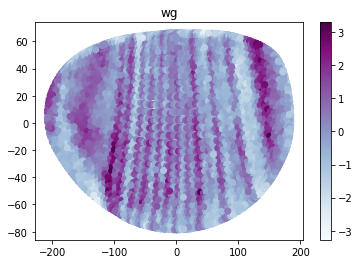

In [16]:
plr.Dmel_visualization(gene = 'wg')

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/perler/perler_class.py:716: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


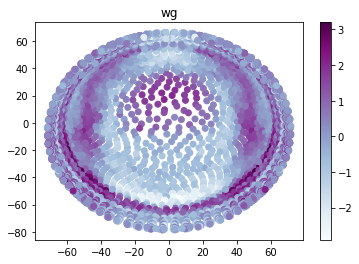

In [18]:
plr.Dmel_visualization(gene = 'wg', view = 'anterior')

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/perler/perler_class.py:698: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


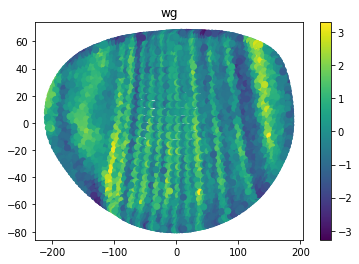

In [19]:
plr.Dmel_visualization(gene = 'wg', color_map = 'viridis')